In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./placement.csv')
df

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1
...,...,...,...
95,6.33,6.38,0
96,8.23,7.76,1
97,6.65,7.78,0
98,8.14,5.63,1


In [3]:
df.shape

(100, 3)

<Axes: xlabel='cgpa', ylabel='resume_score'>

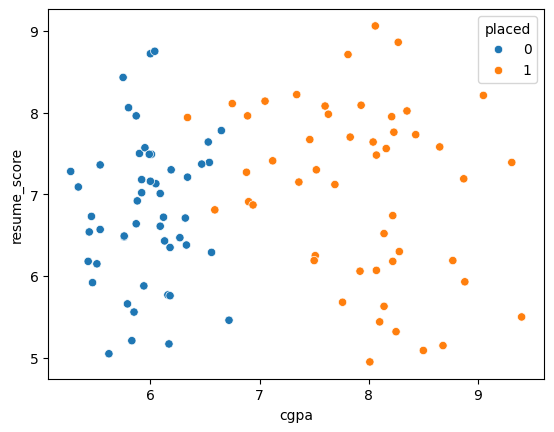

In [4]:
sns.scatterplot(x=df['cgpa'], y=df['resume_score'], hue=df['placed'])

In [5]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [6]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [7]:
p.fit(X,y)

Perceptron()

In [8]:
p.coef_

array([[ 40.26, -36.  ]])

In [9]:
p.intercept_

array([-25.])

In [10]:
!pip install mlxtend

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

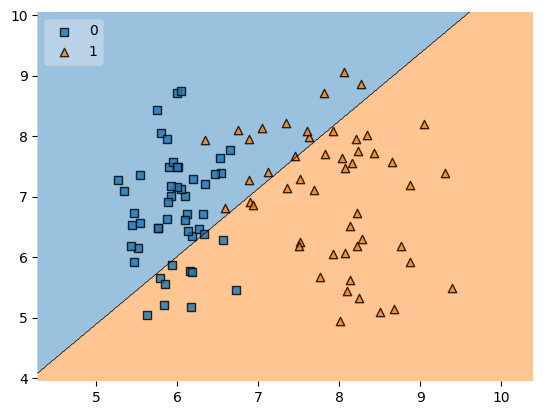

In [11]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, clf=p,legend=2)

## Perceptron trick

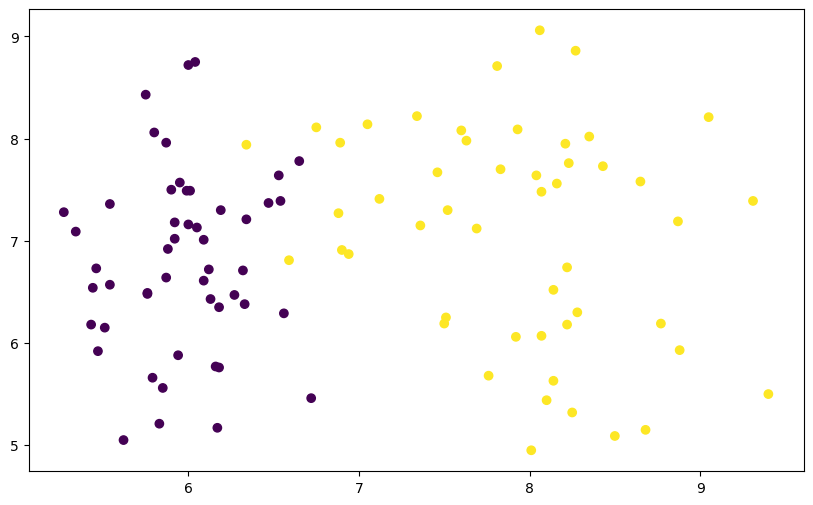

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(df['cgpa'], df['resume_score'], c=y)

In [13]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr =0.1
    
    def step(z):
        return 1 if z>0 else 0
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:],weights

In [14]:
intercept_,coef_,weights = perceptron(X.values,y.values)

In [15]:
print(intercept_,coef_,weights)

-2.600000000000001 [ 4.615 -3.147] [-2.6    4.615 -3.147]


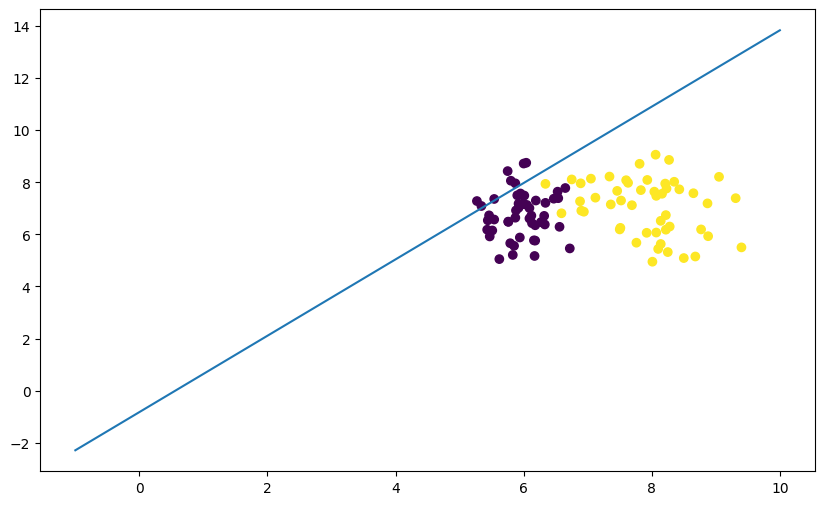

In [16]:
m = -coef_[0]/coef_[1]
c = -intercept_/coef_[1]

x_input =np.linspace(-1,10,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input)
plt.scatter(df['cgpa'], df['resume_score'], c=y)


## this trick not work for all cases 

In [9]:
from sklearn.datasets import make_classification
import numpy as np
X ,y = make_classification(n_samples=100,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,random_state=60)


In [10]:
X.shape

(100, 2)

In [11]:
y.shape

(100,)

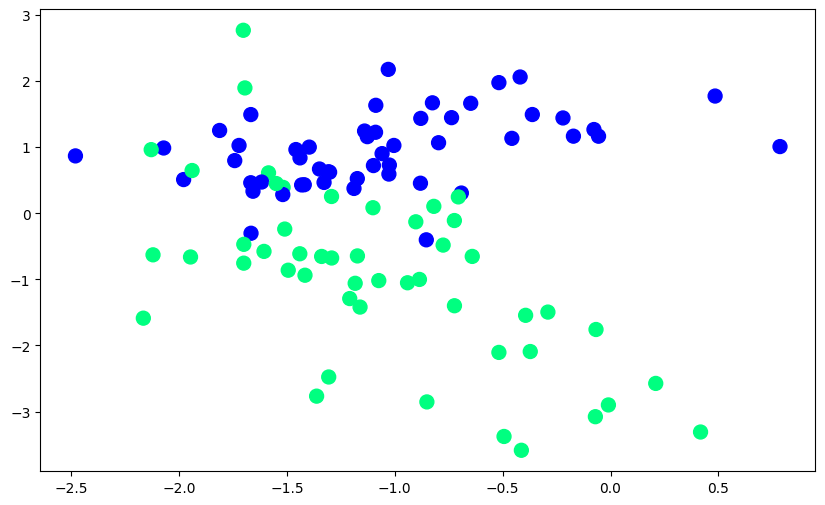

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s = 100)

In [18]:
def perceptron (X,y):
    w1 = w2=b=1
    lr = 0.01
    for j in range(1000):
        for i in range(X.shape[0]):
            if y[i] == 1 and (w1*X[i][0]+w2*X[i][1]+b)<0:
                w1 = w1 + lr*X[i][0]
                w2 = w2 + lr*X[i][1]
                b = b + lr
            elif y[i] == 0 and (w1*X[i][0]+w2*X[i][1]+b)>=0:
                w1 = w1 - lr*X[i][0]
                w2 = w2 - lr*X[i][1]
                b = b - lr
                
    return b,w1,w2

b,w1,w2 = perceptron(X,y)

[Desmos](https://www.desmos.com/calculator/2t7jv8vz0e)

```python

In [14]:
m = -w1/w2
c = -b/w2


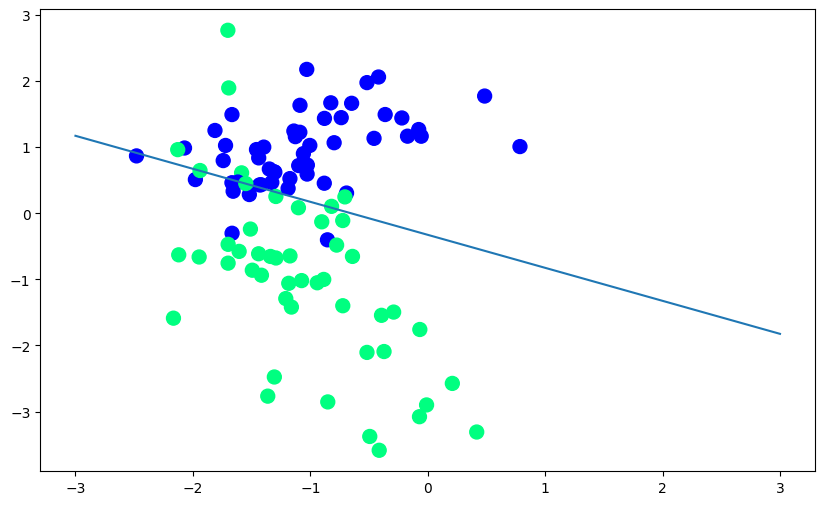

In [15]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s = 100)
